<a href="https://colab.research.google.com/github/AUMANSH/Data-Science-Projects/blob/main/UPDATED_INTRUDER_DETECTION_SYSTEM_LFW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

EIGEN FACES

In [ ]:
import numpy as np
# Sample 5 training images (2x2) as grayscale pixels
X_train = np.array([
    [100, 150, 80, 130],  # Person A
    [102, 148, 85, 129],  # Person A
    [50,  60,  55, 65],   # Person B
    [52,  58,  57, 66],   # Person B
    [200, 210, 190, 205]  # Intruder image
])

y_train = ['A', 'A', 'B', 'B', 'intruder']


In [ ]:
X_train

array([[100, 150,  80, 130],
       [102, 148,  85, 129],
       [ 50,  60,  55,  65],
       [ 52,  58,  57,  66],
       [200, 210, 190, 205]])

In [ ]:
y_train

['A', 'A', 'B', 'B', 'intruder']

In [ ]:
mean_face = np.mean(X_train, axis=0)
mean_face
# Output: [100.8, 125.2, 93.4, 119.0]

array([100.8, 125.2,  93.4, 119. ])

In [ ]:
X_centered

array([[ -0.8,  24.8, -13.4,  11. ],
       [  1.2,  22.8,  -8.4,  10. ],
       [-50.8, -65.2, -38.4, -54. ],
       [-48.8, -67.2, -36.4, -53. ],
       [ 99.2,  84.8,  96.6,  86. ]])

In [ ]:
X_centered = X_train - mean_face


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)


In [ ]:
pca

PCA(n_components=2)

In [ ]:
X_pca

array([[  12.26874735,  -27.66390097],
       [  13.9962146 ,  -22.25914276],
       [-105.10426932,   13.2240318 ],
       [-103.75883087,   16.27452588],
       [ 182.59813824,   20.42448606]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_pca, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
new_face = [103, 149, 87, 128]  # closer to A
new_centered = new_face - mean_face
new_proj = pca.transform([new_centered])  # => [10.1, 0.3]

In [ ]:
new_face

[103, 149, 87, 128]

In [ ]:
new_centered

array([ 2.2, 23.8, -6.4,  9. ])

In [ ]:
mean_face

array([100.8, 125.2,  93.4, 119. ])

In [ ]:
new_proj

array([[ 15.46722526, -21.15125655]])

In [ ]:
knn.predict(new_proj)

array(['A'], dtype='<U8')

In [ ]:
new_face = [180, 195, 185, 198]  # like intruder

In [ ]:
new_centered = new_face - mean_face

In [ ]:
new_centered

array([79.2, 69.8, 91.6, 79. ])

In [ ]:
mean_face

array([100.8, 125.2,  93.4, 119. ])

In [ ]:
new_proj = pca.transform([new_centered])  # => [19.8, 1.2]
new_proj

array([[158.53767623,  22.98736053]])

In [ ]:
knn.predict(new_proj)

array(['intruder'], dtype='<U8')

CNN

In [ ]:
face = np.array([
    [1, 1, 2, 4],
    [1, 2, 2, 4],
    [1, 3, 4, 5],
    [1, 2, 4, 5]
])


In [ ]:
face

array([[1, 1, 2, 4],
       [1, 2, 2, 4],
       [1, 3, 4, 5],
       [1, 2, 4, 5]])

In [ ]:
filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])


In [ ]:
filter

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

[1,1,2]
[1,2,2]
[1,3,4]

Convolution = (0×1 + 1×1 + 0×2 +
               1×1 + -4×2 + 1×2 +
               0×1 + 1×3 + 0×4) = 1 + 1 - 8 + 2 + 3 = -1

main

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_lfw_people
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import joblib
import os


In [ ]:
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
X = lfw.images
y_names = lfw.target_names
y_raw = lfw.target

authorized_ids = [0, 1, 2]
y = np.array([0 if label in authorized_ids else 1 for label in y_raw])  # 0=authorized, 1=intruder

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
X

array([[[0.2130719 , 0.34640524, 0.6156863 , ..., 0.21045752,
         0.16993465, 0.12941177],
        [0.20261438, 0.46928108, 0.703268  , ..., 0.26013073,
         0.20522876, 0.14901961],
        [0.275817  , 0.5908497 , 0.7529412 , ..., 0.28104576,
         0.22091503, 0.15555556],
        ...,
        [0.26797387, 0.2771242 , 0.2875817 , ..., 0.05490197,
         0.07320262, 0.08235294],
        [0.24183007, 0.24313726, 0.25490198, ..., 0.05751634,
         0.07058824, 0.07712419],
        [0.25620916, 0.26143792, 0.25882354, ..., 0.075817  ,
         0.06797386, 0.07843138]],

       [[0.28235295, 0.31895426, 0.27058825, ..., 0.35424837,
         0.32287583, 0.29673204],
        [0.29934642, 0.2901961 , 0.34901962, ..., 0.36862746,
         0.3124183 , 0.30588236],
        [0.35686275, 0.31764707, 0.43790853, ..., 0.38169935,
         0.29803923, 0.29281047],
        ...,
        [0.16993465, 0.15816994, 0.14771242, ..., 0.03921569,
         0.03921569, 0.02875817],
        [0.1

In [ ]:
y_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [ ]:
y_raw

array([61, 25,  9, ..., 14, 15, 14])

In [ ]:
authorized_ids

[0, 1, 2]

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_train

array([[[0.4745098 , 0.5673203 , 0.5908497 , ..., 0.6287582 ,
         0.68888897, 0.6732027 ],
        [0.5176471 , 0.6209151 , 0.62614375, ..., 0.5934641 ,
         0.7294118 , 0.6431373 ],
        [0.5777778 , 0.6614379 , 0.63529414, ..., 0.5633987 ,
         0.7163399 , 0.6392157 ],
        ...,
        [0.5137255 , 0.5555555 , 0.60915035, ..., 0.26928106,
         0.17908497, 0.21176471],
        [0.5137255 , 0.5908497 , 0.64444447, ..., 0.18039216,
         0.19346406, 0.20261438],
        [0.55947715, 0.6405229 , 0.6640523 , ..., 0.15424837,
         0.19869281, 0.20915033]],

       [[0.36993465, 0.33071896, 0.1882353 , ..., 0.15686275,
         0.16601308, 0.19346406],
        [0.33594772, 0.28627452, 0.1385621 , ..., 0.16078432,
         0.11633987, 0.11764706],
        [0.27058825, 0.20784314, 0.13986929, ..., 0.21960784,
         0.09281046, 0.06143791],
        ...,
        [0.07320262, 0.14509805, 0.275817  , ..., 0.3529412 ,
         0.32026145, 0.30980393],
        [0.0

In [ ]:
X_test

array([[[0.22091503, 0.29281047, 0.36601308, ..., 0.38300654,
         0.12941177, 0.1503268 ],
        [0.25620916, 0.3267974 , 0.38562092, ..., 0.475817  ,
         0.17385621, 0.12287582],
        [0.2901961 , 0.3503268 , 0.38431373, ..., 0.5764706 ,
         0.24052288, 0.10849673],
        ...,
        [0.945098  , 0.9124183 , 0.7568627 , ..., 0.08104575,
         0.10196079, 0.14640523],
        [0.9241831 , 0.94640523, 0.9450981 , ..., 0.14248367,
         0.18431373, 0.24575163],
        [0.9359477 , 0.95032674, 0.9712418 , ..., 0.14771242,
         0.20392157, 0.24836601]],

       [[0.3673203 , 0.3908497 , 0.38562095, ..., 0.56078434,
         0.36862746, 0.23006536],
        [0.5568628 , 0.54901963, 0.5503268 , ..., 0.62352943,
         0.5189543 , 0.30588236],
        [0.31111112, 0.28366014, 0.3398693 , ..., 0.6013072 ,
         0.59477127, 0.4392157 ],
        ...,
        [0.22614379, 0.11764706, 0.01699346, ..., 0.57254905,
         0.59607846, 0.58431375],
        [0.1

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

In [ ]:
X_train_flat

array([[0.4745098 , 0.5673203 , 0.5908497 , ..., 0.15424837, 0.19869281,
        0.20915033],
       [0.36993465, 0.33071896, 0.1882353 , ..., 0.37385622, 0.40915036,
        0.4039216 ],
       [0.3869281 , 0.5542484 , 0.6313725 , ..., 0.14248367, 0.11633987,
        0.1254902 ],
       ...,
       [0.5163399 , 0.49803922, 0.47843137, ..., 0.29542485, 0.30457518,
        0.31895426],
       [0.42352942, 0.5647059 , 0.60915035, ..., 0.27320263, 0.43137255,
        0.42091504],
       [0.28235295, 0.2888889 , 0.31633988, ..., 0.04705882, 0.04444445,
        0.05228758]], dtype=float32)

In [ ]:
X_test_flat

array([[0.22091503, 0.29281047, 0.36601308, ..., 0.14771242, 0.20392157,
        0.24836601],
       [0.3673203 , 0.3908497 , 0.38562095, ..., 0.6117647 , 0.7660131 ,
        0.8418301 ],
       [0.22745098, 0.17777778, 0.14901961, ..., 0.29150328, 0.29411766,
        0.30849674],
       ...,
       [0.24444444, 0.3895425 , 0.475817  , ..., 0.0496732 , 0.06928105,
        0.08496732],
       [0.36732027, 0.47843137, 0.5267974 , ..., 0.9359477 , 0.7176471 ,
        0.6679738 ],
       [0.5882353 , 0.5882353 , 0.5908497 , ..., 0.0627451 , 0.07712419,
        0.09411765]], dtype=float32)

In [ ]:
mean_face = np.mean(X_train_flat, axis=0)
mean_face

array([0.3191157 , 0.33821675, 0.37288624, ..., 0.45306653, 0.43026337,
       0.40365332], dtype=float32)

In [ ]:
X_train_centered = X_train_flat - mean_face
X_train_centered

array([[ 1.5539411e-01,  2.2910354e-01,  2.1796346e-01, ...,
        -2.9881817e-01, -2.3157056e-01, -1.9450299e-01],
       [ 5.0818950e-02, -7.4977875e-03, -1.8465094e-01, ...,
        -7.9210311e-02, -2.1113008e-02,  2.6828051e-04],
       [ 6.7812413e-02,  2.1603164e-01,  2.5848627e-01, ...,
        -3.1058288e-01, -3.1392351e-01, -2.7816314e-01],
       ...,
       [ 1.9722420e-01,  1.5982246e-01,  1.0554513e-01, ...,
        -1.5764168e-01, -1.2568820e-01, -8.4699064e-02],
       [ 1.0441372e-01,  2.2648916e-01,  2.3626411e-01, ...,
        -1.7986390e-01,  1.1091828e-03,  1.7261714e-02],
       [-3.6762744e-02, -4.9327850e-02, -5.6546360e-02, ...,
        -4.0600771e-01, -3.8581893e-01, -3.5136575e-01]], dtype=float32)

In [ ]:
X_test_centered = X_test_flat - mean_face
X_test_centered

array([[-0.09820066, -0.04540628, -0.00687316, ..., -0.30535412,
        -0.2263418 , -0.15528731],
       [ 0.0482046 ,  0.05263296,  0.01273471, ...,  0.1586982 ,
         0.33574972,  0.43817675],
       [-0.09166472, -0.16043897, -0.22386663, ..., -0.16156325,
        -0.13614571, -0.09515658],
       ...,
       [-0.07467125,  0.05132574,  0.10293075, ..., -0.40339333,
        -0.36098233, -0.318686  ],
       [ 0.04820457,  0.14021462,  0.15391117, ...,  0.4828812 ,
         0.2873837 ,  0.2643205 ],
       [ 0.26911962,  0.25001857,  0.21796346, ..., -0.39032143,
        -0.3531392 , -0.30953568]], dtype=float32)

In [ ]:
pca = PCA(n_components=100, svd_solver='randomized')
pca

PCA(n_components=100, svd_solver='randomized')

In [ ]:
X_train_pca = pca.fit_transform(X_train_centered)
X_train_pca

array([[-0.3791952 , -0.48729655,  0.04929919, ..., -0.26087576,
         0.28699315,  0.2527866 ],
       [ 1.8997837 ,  0.5198013 , -1.186989  , ...,  0.03627065,
        -0.19120127,  0.0278796 ],
       [-1.8761833 , -2.867083  ,  4.4867864 , ...,  0.15324238,
         0.1064833 ,  0.1296748 ],
       ...,
       [-6.8586526 , -0.76105833,  1.236022  , ...,  0.08825792,
        -0.02707941,  0.04677524],
       [ 0.47266543, -3.2163951 , -0.66749966, ..., -0.02257744,
        -0.14808734, -0.0853539 ],
       [ 0.08436697,  1.2038572 , -0.9373601 , ..., -0.1071566 ,
         0.28425106, -0.14056845]], dtype=float32)

In [ ]:
X_test_pca = pca.transform(X_test_centered)
X_test_pca

array([[ 3.6322181 ,  1.1055936 , -1.6529422 , ...,  0.10011722,
         0.3986023 ,  0.02376615],
       [ 4.369128  ,  4.276334  , -2.0255682 , ..., -0.03583772,
         0.31444538, -0.36020157],
       [-0.5308045 ,  1.2759196 , -1.5049633 , ..., -0.04138942,
        -0.03989471,  0.10900808],
       ...,
       [-0.7362504 ,  0.4722351 ,  0.7472077 , ...,  0.25590396,
        -0.03501536,  0.20456217],
       [ 1.1993071 ,  1.1582673 ,  0.7695961 , ..., -0.08627307,
        -0.35437524, -0.12228417],
       [-0.45190126,  0.41674796, -0.10132919, ...,  0.40090507,
        -0.09210136, -0.13860166]], dtype=float32)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
joblib.dump(pca, "pca_model.pkl")
joblib.dump(knn, "knn_model.pkl")
np.save("mean_face.npy", mean_face)

In [ ]:
X_train_cnn = X_train.reshape(-1, X.shape[1], X.shape[2], 1) / 255.0
X_train_cnn

array([[[[1.8608228e-03],
         [2.2247855e-03],
         [2.3170577e-03],
         ...,
         [2.4657184e-03],
         [2.7015253e-03],
         [2.6400106e-03]],

        [[2.0299887e-03],
         [2.4349613e-03],
         [2.4554657e-03],
         ...,
         [2.3273102e-03],
         [2.8604383e-03],
         [2.5221070e-03]],

        [[2.2657954e-03],
         [2.5938742e-03],
         [2.4913496e-03],
         ...,
         [2.2094068e-03],
         [2.8091760e-03],
         [2.5067283e-03]],

        ...,

        [[2.0146100e-03],
         [2.1786492e-03],
         [2.3888249e-03],
         ...,
         [1.0560042e-03],
         [7.0229400e-04],
         [8.3044986e-04]],

        [[2.0146100e-03],
         [2.3170577e-03],
         [2.5272332e-03],
         ...,
         [7.0742023e-04],
         [7.5868255e-04],
         [7.9456618e-04]],

        [[2.1940281e-03],
         [2.5118545e-03],
         [2.6041267e-03],
         ...,
         [6.0489558e-04],
        

In [ ]:
X_test_cnn = X_test.reshape(-1, X.shape[1], X.shape[2], 1) / 255.0
X_test_cnn

array([[[[8.6633349e-04],
         [1.1482764e-03],
         [1.4353454e-03],
         ...,
         [1.5019864e-03],
         [5.0749717e-04],
         [5.8951689e-04]],

        [[1.0047419e-03],
         [1.2815584e-03],
         [1.5122389e-03],
         ...,
         [1.8659490e-03],
         [6.8178907e-04],
         [4.8186595e-04]],

        [[1.1380239e-03],
         [1.3738306e-03],
         [1.5071126e-03],
         ...,
         [2.2606691e-03],
         [9.4322697e-04],
         [4.2547740e-04]],

        ...,

        [[3.7062666e-03],
         [3.5781111e-03],
         [2.9680890e-03],
         ...,
         [3.1782649e-04],
         [3.9984621e-04],
         [5.7413819e-04]],

        [[3.6242474e-03],
         [3.7113931e-03],
         [3.7062671e-03],
         ...,
         [5.5875949e-04],
         [7.2279893e-04],
         [9.6373190e-04]],

        [[3.6703832e-03],
         [3.7267716e-03],
         [3.8087913e-03],
         ...,
         [5.7926442e-04],
        

In [ ]:

y_train_cnn = to_categorical(y_train, num_classes=2)
y_train_cnn

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
y_test_cnn = to_categorical(y_test, num_classes=2)

In [ ]:

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn

<Sequential name=sequential, built=True>

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9277 - loss: 0.3070 - val_accuracy: 0.9686 - val_loss: 0.1414
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9637 - loss: 0.1588 - val_accuracy: 0.9686 - val_loss: 0.1395
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.1333 - val_accuracy: 0.9686 - val_loss: 0.1398
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9721 - loss: 0.1292 - val_accuracy: 0.9686 - val_loss: 0.1435
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9751 - loss: 0.1242 - val_accuracy: 0.9686 - val_loss: 0.1406
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9699 - loss: 0.1386 - val_accuracy: 0.9686 - val_loss: 0.1395
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9707 - loss: 0.1343 - val_accuracy: 0.9686 - val_loss: 0.1396
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9684 - loss: 0.1412 - val_accuracy: 0.9686 - val_loss

In [ ]:
cnn.save("cnn_model.keras")

In [ ]:
def hybrid_predict(test_image):
    img_flat = test_image.flatten()
    img_centered = img_flat - mean_face
    img_pca = pca.transform([img_centered])
    pred_knn = knn.predict(img_pca)[0]

    img_cnn = test_image.reshape(1, X.shape[1], X.shape[2], 1) / 255.0
    pred_cnn = np.argmax(cnn.predict(img_cnn, verbose=0))

    return 1 if (pred_knn == 1 or pred_cnn == 1) else 0


In [ ]:
y_pred_hybrid = np.array([hybrid_predict(img) for img in X_test])

print("HYBRID SYSTEM - INTRUDER DETECTION METRICS")
print(classification_report(y_test, y_pred_hybrid, target_names=["Authorized", "Intruder"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hybrid))


HYBRID SYSTEM - INTRUDER DETECTION METRICS
              precision    recall  f1-score   support

  Authorized       0.00      0.00      0.00        19
    Intruder       0.97      1.00      0.98       586

    accuracy                           0.97       605
   macro avg       0.48      0.50      0.49       605
weighted avg       0.94      0.97      0.95       605

Confusion Matrix:
 [[  0  19]
 [  0 586]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import random

# Visualize 10 random predictions from test set
random_indices = random.sample(range(len(X_test)), 10)
random_indices

[193, 390, 393, 420, 19, 55, 96, 184, 575, 549]

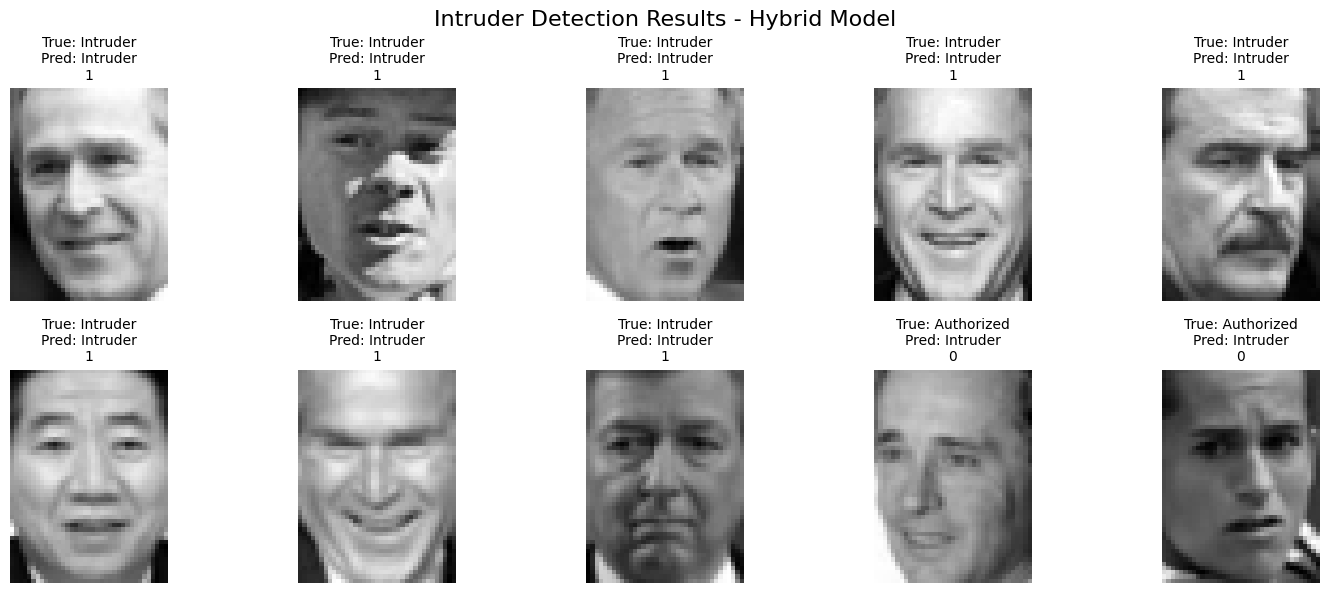

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Intruder Detection Results - Hybrid Model", fontsize=16)

for i, idx in enumerate(random_indices):
    img = X_test[idx]
    pred_label = hybrid_predict(img)
    true_label = y_test[idx]

    ax = axes[i // 5, i % 5]
    ax.imshow(img, cmap='gray')
    ax.axis('off')

    result = 1 if pred_label == true_label else 0
    ax.set_title(
        f"True: {'Intruder' if true_label == 1 else 'Authorized'}\n"
        f"Pred: {'Intruder' if pred_label == 1 else 'Authorized'}\n{result}",
        fontsize=10
    )

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [ ]:


print("\nEigenfaces (k-NN) Intruder Detection Metrics:")
# To get Eigenfaces-only metrics, we need to evaluate the k-NN model on the test set
y_pred_knn = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn, target_names=["Authorized", "Intruder"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

print("\nCNN Intruder Detection Metrics:")
# To get CNN-only metrics, we need to evaluate the CNN model on the test set
y_pred_cnn_prob = cnn.predict(X_test_cnn, verbose=0)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)
print(classification_report(y_test, y_pred_cnn, target_names=["Authorized", "Intruder"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))



Eigenfaces (k-NN) Intruder Detection Metrics:
              precision    recall  f1-score   support

  Authorized       0.50      0.05      0.10        19
    Intruder       0.97      1.00      0.98       586

    accuracy                           0.97       605
   macro avg       0.74      0.53      0.54       605
weighted avg       0.96      0.97      0.96       605

Confusion Matrix:
 [[  1  18]
 [  1 585]]

CNN Intruder Detection Metrics:
              precision    recall  f1-score   support

  Authorized       0.00      0.00      0.00        19
    Intruder       0.97      1.00      0.98       586

    accuracy                           0.97       605
   macro avg       0.48      0.50      0.49       605
weighted avg       0.94      0.97      0.95       605

Confusion Matrix:
 [[  0  19]
 [  0 586]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
